<h1 id="Contents">Contents<a href="#Contents"></a></h1>
        <ol>
        <li><a class="" href="#Imports">Imports</a></li>
<li><a class="" href="#Defining-the-Data-Directory-and-Result-Directory">Defining the Data Directory and Result Directory</a></li>
<li><a class="" href="#Extracting-Center-Information">Extracting Center Information</a></li>
<ol><li><a class="" href="#Initializing-the-Classes">Initializing the Classes</a></li>
<li><a class="" href="#Determining-the-Region-of-Interest">Determining the Region of Interest</a></li>
<li><a class="" href="#Reiniatilizing-the-Classes">Reiniatilizing the Classes</a></li>
<li><a class="" href="#Setting-the-Reference-Image">Setting the Reference Image</a></li>
<li><a class="" href="#Extracting-Center-Related-Information">Extracting Center Related Information</a></li>
<li><a class="" href="#Some-Preliminary-Analysis">Some Preliminary Analysis</a></li>
<ol><li><a class="" href="#None-Values">None Values</a></li>
<li><a class="" href="#Sample-Images">Sample Images</a></li>
</ol></ol><li><a class="" href="#Extracting-Informations-From-DataFrame">Extracting Informations From DataFrame</a></li>
<ol><li><a class="" href="#Frame-Informations">Frame Informations</a></li>
<ol><li><a class="" href="#Information-About-DataFrame">Information About DataFrame</a></li>
<li><a class="" href="#Information-about-Frames-Numbers">Information about Frames Numbers</a></li>
<ol><li><a class="" href="#Getting-Numerical-Frame-Number">Getting Numerical Frame Number</a></li>
</ol><li><a class="" href="#Creating-New-Columns">Creating New Columns</a></li>
<ol><li><a class="" href="#The-Region-and-Time">The Region and Time</a></li>
<li><a class="" href="#The-Speeds">The Speeds</a></li>
<li><a class="" href="#Angle">Angle</a></li>
</ol><li><a class="" href="#Extracting-Values">Extracting Values</a></li>
<ol><li><a class="" href="#Height">Height</a></li>
<li><a class="" href="#Angles">Angles</a></li>
<li><a class="" href="#Speeds">Speeds</a></li>
</ol></ol></ol><li><a class="" href="#Fitting-Curves">Fitting Curves</a></li>
<ol><li><a class="" href="#The-Curves-to-be-Fitted">The Curves to be Fitted</a></li>
<li><a class="" href="#Region-III">Region III</a></li>
<ol><li><a class="" href="#Data-For-Region-III">Data For Region III</a></li>
<li><a class="" href="#Fitting-the-Curves-In-Region-III">Fitting the Curves In Region III</a></li>
<li><a class="" href="#Caparing-Results-For-Region-III">Caparing Results For Region III</a></li>
<li><a class="" href="#Calculating-Informations-From-Parameters-In-Region-III">Calculating Informations From Parameters In Region III</a></li>
<ol><li><a class="" href="#The-Speeds-In-Region-III">The Speeds In Region III</a></li>
<li><a class="" href="#The-Angle-In-Region-III">The Angle In Region III</a></li>
</ol><li><a class="" href="#Visualizating-Results-In-Region-III">Visualizating Results In Region III</a></li>
<ol><li><a class="" href="#x-and-y-Coordinates-In-Region-III">x and y Coordinates In Region III</a></li>
<li><a class="" href="#Speeds-In-Region-III">Speeds In Region III</a></li>
<li><a class="" href="#Angle-In-Region-III">Angle In Region III</a></li>
</ol><li><a class="" href="#Getting-The-Required-Informations-In-Region-III">Getting The Required Informations In Region III</a></li>
<li><a class="" href="#Adding-the-Information-for-Region-III-to-DataFrame">Adding the Information for Region III to DataFrame</a></li>
</ol><li><a class="" href="#Region-I">Region I</a></li>
<ol><li><a class="" href="#Data-For-Region-I">Data For Region I</a></li>
<li><a class="" href="#Fitting-the-Curves">Fitting the Curves</a></li>
<li><a class="" href="#Caparing-Results">Caparing Results</a></li>
<li><a class="" href="#Calculating-Informations-From-Parameters">Calculating Informations From Parameters</a></li>
<ol><li><a class="" href="#The-Speeds">The Speeds</a></li>
<li><a class="" href="#The-Angle">The Angle</a></li>
</ol><li><a class="" href="#Visualizating-Results">Visualizating Results</a></li>
<ol><li><a class="" href="#x-and-y-Coordinates">x and y Coordinates</a></li>
<li><a class="" href="#Speeds">Speeds</a></li>
<li><a class="" href="#Angle">Angle</a></li>
</ol><li><a class="" href="#Getting-The-Required-Informations">Getting The Required Informations</a></li>
</ol></ol><li><a class="" href="#Adding-the-Additional-Information">Adding the Additional Information</a></li>
<ol><li><a class="" href="#Saving-Informations-to-DataFrame">Saving Informations to DataFrame</a></li>
<li><a class="" href="#The-Text-Information">The Text Information</a></li>
<ol><li><a class="" href="#Creating-the-Text">Creating the Text</a></li>
<li><a class="" href="#Save-the-DataFrames">Save the DataFrames</a></li>
</ol>

# Imports

In [1]:
from extract_center import CenterExtracter
from run import Run
from misc_tools import Plotter, Smoother
from functools import partial
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import warnings

warnings.filterwarnings("ignore")
plt.rcdefaults()
matplotlib.rcParams["figure.figsize"] = (8, 6)


# Defining the Data Directory and Result Directory


In [2]:
sequence = "h7"
DATA_DIR = "../../data/extracted_images/" + sequence
RESULT_DIR = "../../data/results/" + sequence

# Extracting Center Information


## Initializing the Classes


In [3]:
run = Run(DATA_DIR, RESULT_DIR)
ce = CenterExtracter()

## Determining the _Region of Interest_


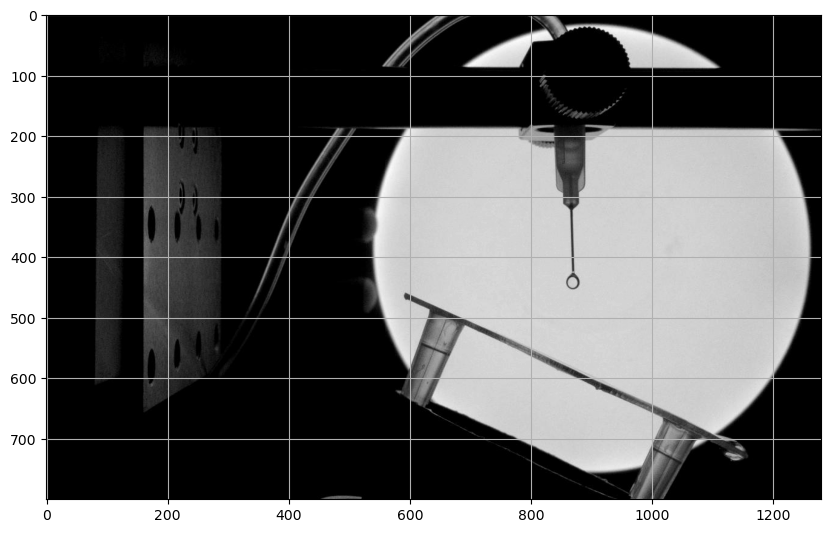

In [4]:
images = run.get_images()
img_1 = ce._read_image(images[0])
ce._show_image(img_1)


In [5]:
region_of_interset = (850, 400, 950, 500)

## Reiniatilizing the Classes


In [6]:
run = Run(DATA_DIR, RESULT_DIR, region=region_of_interset)

## Setting the Reference Image


In [7]:
run._set_ref_image(-10)

## Extracting Center Related Information


In [8]:
dynamic_cropping = True
if dynamic_cropping:
    file_name = "dynamic_ap.csv"
    df_name = "/dynamic_ap.csv"
else:
    file_name = "ap"
    df_name = "/centers_using_ap.csv"
df = run.all_points(
    crop_included=True,
    binary=True,
    verbose=False,
    num_images=None,
    raise_error=False,
    file_name=file_name,
    dynamic_cropping=dynamic_cropping
,
)


Getting list of images...


Extracting data from images...: 100%|██████████| 273/273 [00:07<00:00, 37.51it/s]

Saving to csv...
Done!


## Some Preliminary Analysis


### None Values


In [9]:
df.isna().sum()


id         0
x        120
y        120
r1       120
r2       120
theta    120
dtype: int64

In [10]:
none_values = df.isna().sum()["x"]
total_frames = len(df)
unrealistic = len(
    df[((df["r1"] + df["r2"]) / 2 > 20) | ((df["r1"] + df["r2"]) / 2 < 5)]
)


In [11]:
none_values, unrealistic

(120, 2)

In [12]:
df = pd.read_csv(RESULT_DIR + df_name)

### Sample Images


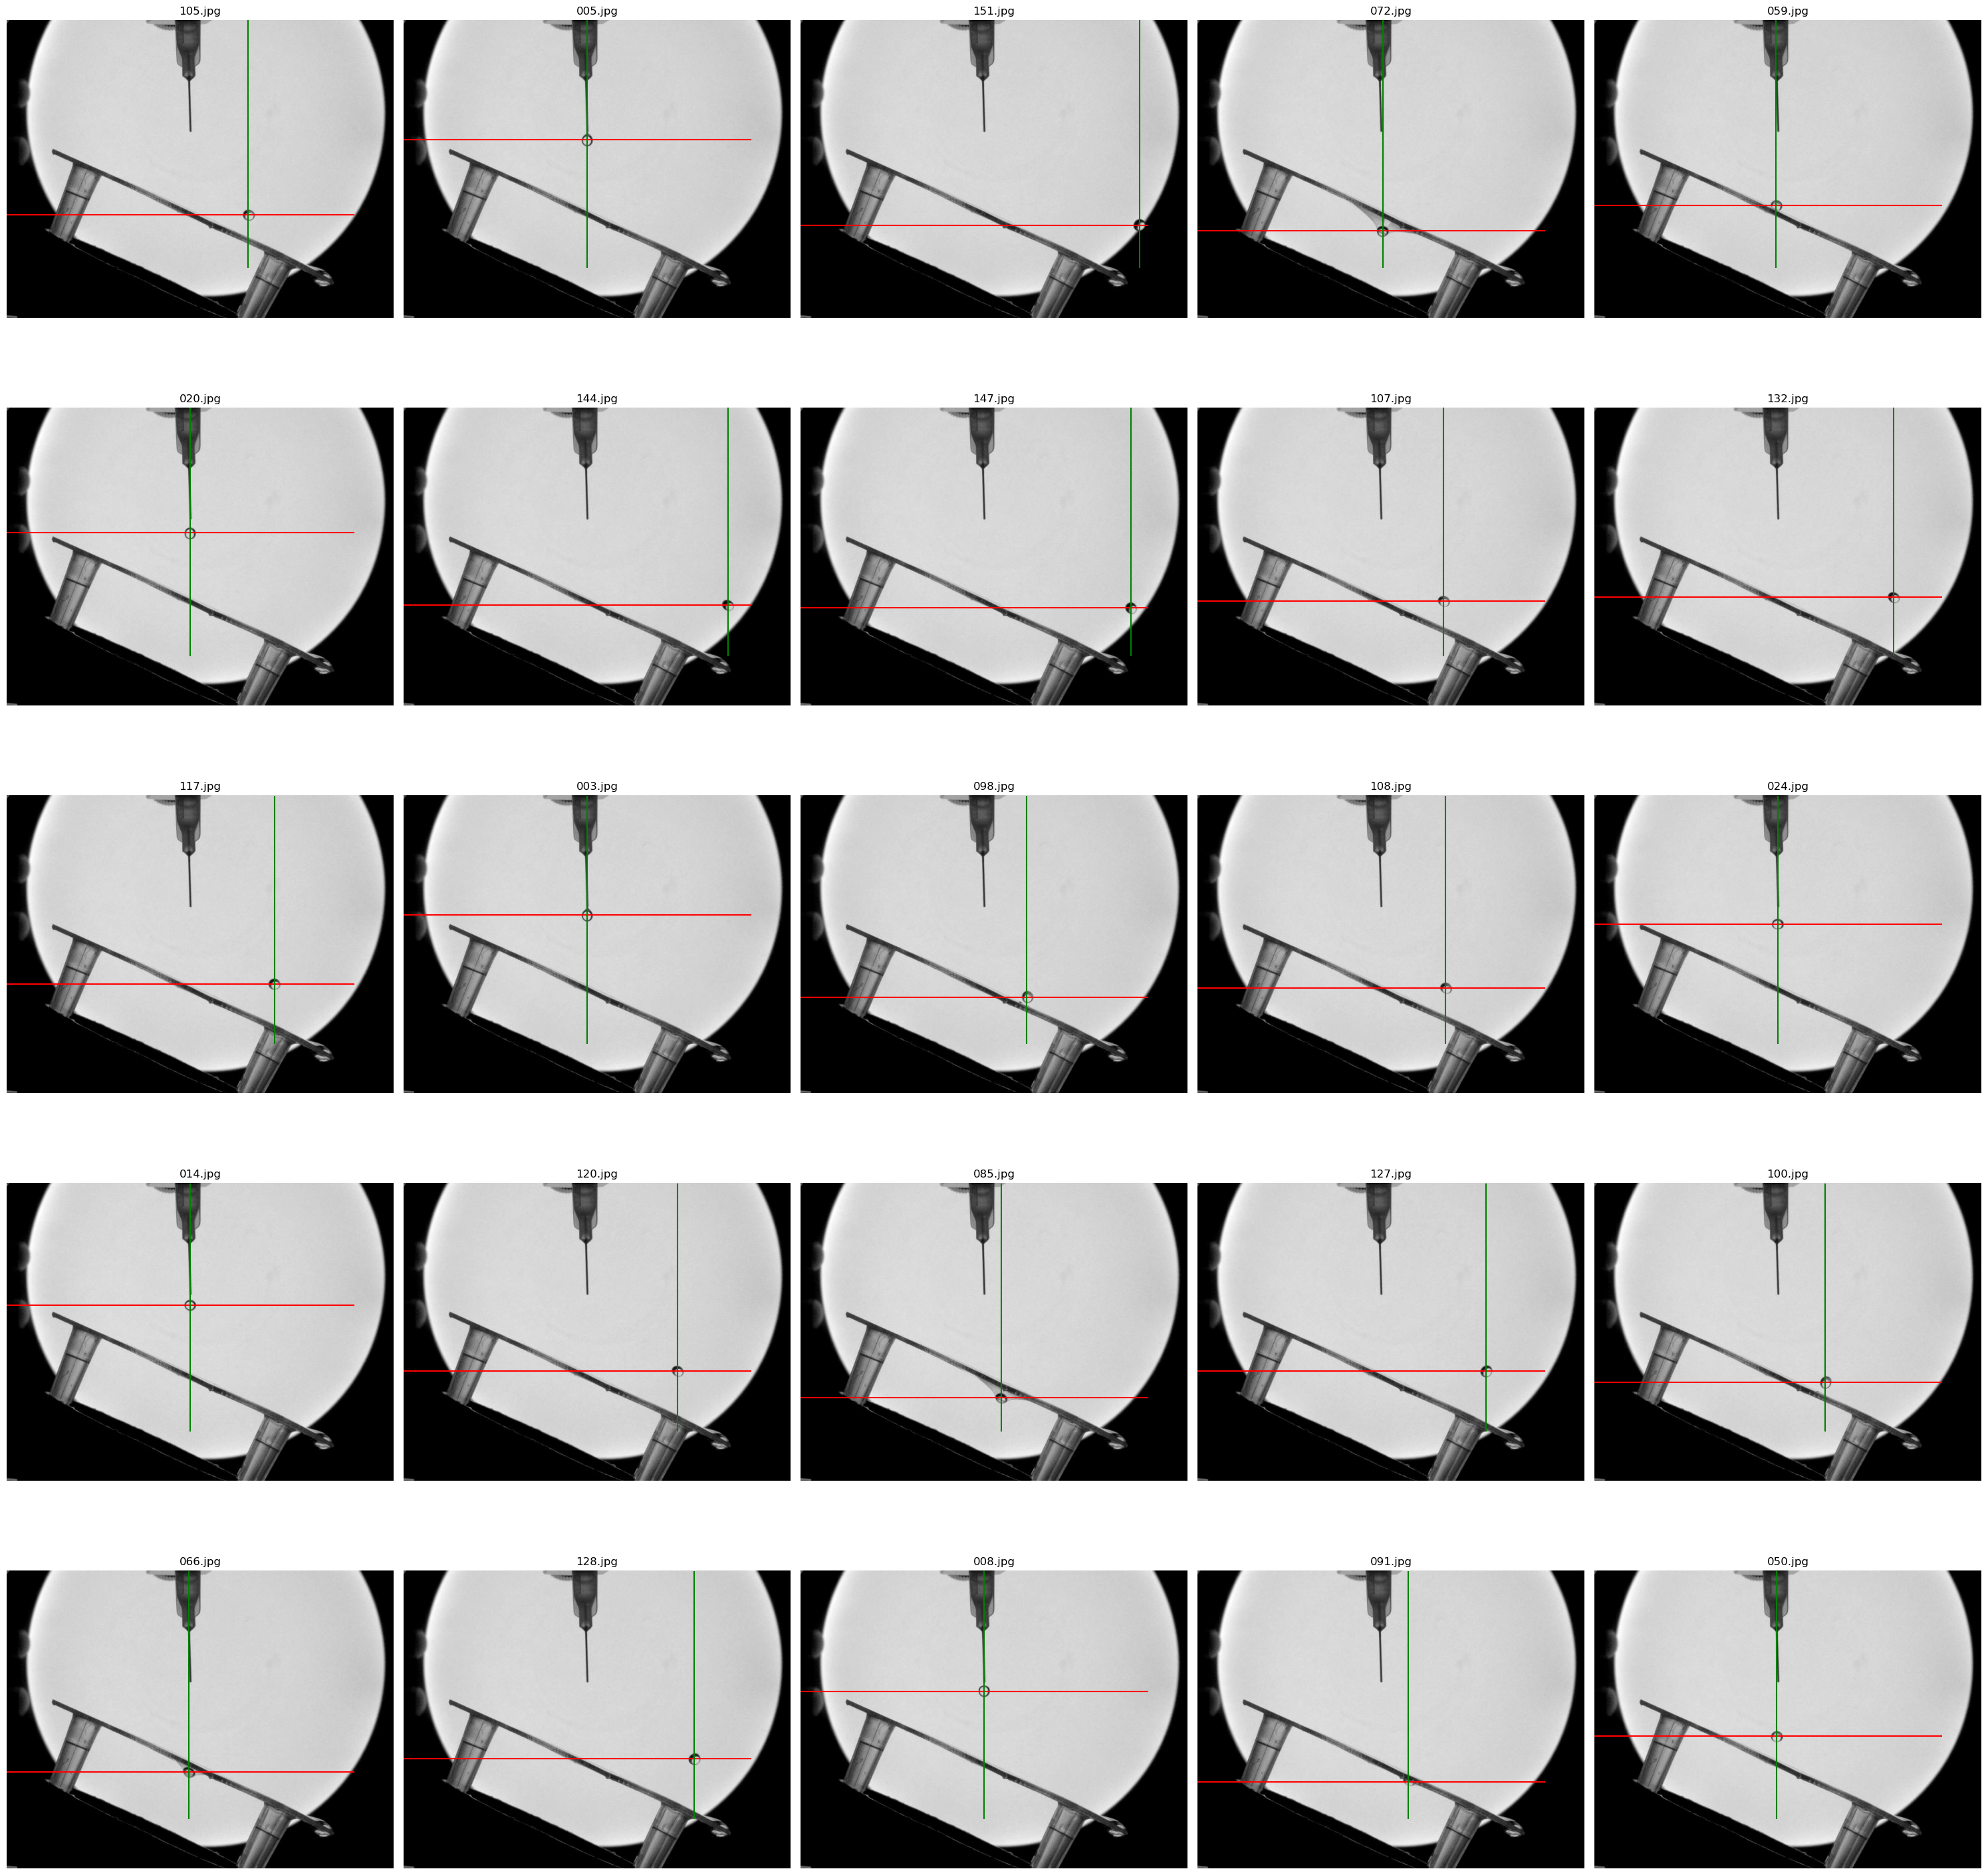

In [13]:
p = Plotter(df, RESULT_DIR)
p.get_samples(25, file_name=f"{sequence}_samples.png")


# Extracting Informations From DataFrame


## Frame Informations


### Information About DataFrame


In [14]:
df = pd.read_csv(RESULT_DIR + df_name)

In [15]:
none_frames = df.isna().sum()["x"]
total_frames = len(df)
unrealistic = len(
    df[((df["r1"] + df["r2"]) / 2 > 20) | ((df["r1"] + df["r2"]) / 2 < 5)]
)


### Information about Frames Numbers


In [16]:
info_dict = {
    "first_frame": 1,
    "last_frame": 2,
    "contact_frame": 3,
    "leave_frame": 4,
    "angle": 5,
    "passthrough": 6,
}


In [17]:
def get_info(file):
    information = {}
    with open(file, "r") as f:
        texts = f.readlines()
    for key, value in info_dict.items():
        line = texts[value]
        info = line.split(":")[1].strip()
        information[key] = info
    return information


information = get_info(f"{DATA_DIR}.txt")


In [18]:
first_frame = DATA_DIR + "/" + information["first_frame"]
last_frame = DATA_DIR + "/" + information["last_frame"]
contact_frame = DATA_DIR + "/" + information["contact_frame"]
angle = information["angle"]
leave_frame = DATA_DIR + "/" + information["leave_frame"]
passthrough = information["passthrough"]


#### Getting Numerical Frame Number


In [19]:
reg = re.compile(r"\d{2,3}")
first_frame_num = int(reg.findall(first_frame)[0])
contact_frame_num = int(reg.findall(contact_frame)[0])
leave_frame_num = int(reg.findall(leave_frame)[0])
last_frame_num = int(reg.findall(last_frame)[0])
first_frame_num, contact_frame_num, leave_frame_num, last_frame_num


(6, 59, 98, 170)

In [20]:
df = df.loc[:last_frame_num]

## Creating New Columns


### The Region and Time


In [21]:
s = Smoother(df)
df_s = s.smoothen(remove_noise=False)
df_c = df[df["x"].notna()]

In [22]:
def get_region(id):
    id = id.split("/")[-1].split(".")[0]
    id = int(id)
    if id<=first_frame_num:
        return "O"
    elif id>=first_frame_num and id<=contact_frame_num:
        return "I"
    elif id>=contact_frame_num and id<=leave_frame_num:
        return "II"
    else:
        return "III"


In [23]:
df_c["Region"] = df_c["id"].apply(get_region)
df_s["Region"] = df_s["id"].apply(get_region)


In [24]:
def get_time(id):
    id = id.split("/")[-1].split(".")[0]
    id = int(id)
    return id


In [25]:
df_c["time"] = df_c["id"].apply(get_time)
df_s["time"] = df_s["id"].apply(get_time)


### The Speeds


In [26]:
df_s["vx"] = df_s["x"].diff(7) / 7
df_s["vy"] = df_s["y"].diff(7) / 7
df_s.dropna(inplace=True)
df_s["vx"] = df_s["vx"].astype(float)
df_s["vy"] = df_s["vy"].astype(float)
df_s["v"] = np.sqrt(df_s["vx"] ** 2 + df_s["vy"] ** 2)

df_c["vx"] = df_c["x"].diff(7) / 7
df_c["vy"] = df_c["y"].diff(7) / 7
df_c.dropna(inplace=True)
df_c["vx"] = df_c["vx"].astype(float)
df_c["vy"] = df_c["vy"].astype(float)
df_c["v"] = np.sqrt(df_c["vx"] ** 2 + df_c["vy"] ** 2)


In [27]:
# plt.plot(df_s["vy"], label = "smoothened")
# plt.plot(df_c["vy"], label = "raw")
# plt.legend();


In [28]:
# plt.plot(df_s["v"], label = "smoothened")
# plt.plot(df_c["v"], label = "raw")
# plt.legend();


### Angle


In [29]:
def get_angle(row):
    vx = row["vx"]
    vy = -row["vy"]
    if vx == 0 and vy == 0:
        return 0
    elif vx == 0:
        return 90
    else:
        return np.arctan(vy / vx) * 180 / np.pi


In [30]:
df_s["angle"] = df_s.apply(get_angle, axis=1)
df_c["angle"] = df_c.apply(get_angle, axis=1)


In [31]:
# plt.plot(df_s["angle"], label = "smoothened")
# plt.plot(df_c["angle"], label = "raw")
# plt.legend();


## Extracting Values


### Height


In [36]:
first_frame_num+=1

In [37]:
y0 = df_c[df_c["time"] == first_frame_num]["y"].values[0]
yc = df_c[df_c["time"] == contact_frame_num]["y"].values[0]
hc = yc - y0

y0 = df_s[df_s["time"] == first_frame_num]["y"].values[0]
ys = df_s[df_s["time"] == contact_frame_num]["y"].values[0]
hs = ys - y0
hc, hs


(131.0, 132.06730951030443)

### Angles


In [38]:
df_c[df_c["time"] == contact_frame_num].T


59
id      ../../data/extracted_images/h7/059.jpg
x                                        866.0
y                                        573.0
r1                                        10.0
r2                                         9.0
theta                                 7.448451
Region                                       I
time                                        59
vx                                   -0.142857
vy                                    4.428571
v                                     4.430875
angle                                 88.15239

In [39]:
df_c[df_c["time"] == leave_frame_num].T


98
id      ../../data/extracted_images/h7/098.jpg
x                                        955.0
y                                        607.0
r1                                         9.0
r2                                        12.0
theta                                27.501974
Region                                      II
time                                        98
vx                                    4.857143
vy                                   -2.714286
v                                     5.564098
angle                                29.197486

In [40]:
df_s[df_s["time"] == contact_frame_num].T


59
id      ../../data/extracted_images/h7/059.jpg
x                                   865.652297
y                                   574.093969
r1                                    8.272074
r2                                    9.568728
theta                                84.012036
r                                     8.685196
Region                                       I
time                                        59
vx                                   -0.065689
vy                                    4.463036
v                                      4.46352
angle                                89.156757

In [41]:
df_s[df_s["time"] == leave_frame_num].T


98
id      ../../data/extracted_images/h7/098.jpg
x                                   954.527888
y                                   606.776328
r1                                    7.912082
r2                                     9.43184
theta                                59.728548
r                                     8.388353
Region                                      II
time                                        98
vx                                     4.33047
vy                                   -2.194906
v                                     4.854955
angle                                26.878245

In [42]:
angle_at_contact_frame_s = df_s.loc[contact_frame_num]["angle"]
angle_at_leave_frame_s = df_s.loc[leave_frame_num]["angle"]

angle_at_contact_frame_c = df_c.loc[contact_frame_num]["angle"]
angle_at_leave_frame_c = df_c.loc[leave_frame_num]["angle"]


if angle_at_contact_frame_s < 0:
    angle_at_contact_frame_s = 180 + angle_at_contact_frame_s

if angle_at_contact_frame_c < 0:
    angle_at_contact_frame_c = 180 + angle_at_contact_frame_c


angle_at_contact_frame_c, angle_at_contact_frame_s, angle_at_leave_frame_c, angle_at_leave_frame_s


(88.15238973400541, 89.15675689171152, 29.19748604606448, 26.87824491366434)

### Speeds


In [43]:
velocity_at_leave_frame_s = df_s.loc[leave_frame_num]["v"]
velocity_at_contact_frame_s = df_s.loc[contact_frame_num]["v"]
velocity_at_leave_frame_s, velocity_at_contact_frame_s

(4.854954618320231, 4.463519883404819)

In [44]:
velocity_at_leave_frame_c = df_c.loc[leave_frame_num]["v"]
velocity_at_contact_frame_c = df_c.loc[contact_frame_num]["v"]
velocity_at_leave_frame_c, velocity_at_contact_frame_c


(5.564097741185842, 4.430874976934521)

In [45]:
x_velocity_at_leave_frame_s = df_s.loc[leave_frame_num]["vx"]
x_velocity_at_contact_frame_s = df_s.loc[contact_frame_num]["vx"]
y_velocity_at_leave_frame_s = df_s.loc[leave_frame_num]["vy"]
y_velocity_at_contact_frame_s = df_s.loc[contact_frame_num]["vy"]
print(
    x_velocity_at_leave_frame_s,
    x_velocity_at_contact_frame_s,
    y_velocity_at_leave_frame_s,
    y_velocity_at_contact_frame_s,
)

x_velocity_at_leave_frame_c = df_c.loc[leave_frame_num]["vx"]
x_velocity_at_contact_frame_c = df_c.loc[contact_frame_num]["vx"]
y_velocity_at_leave_frame_c = df_c.loc[leave_frame_num]["vy"]
y_velocity_at_contact_frame_c = df_c.loc[contact_frame_num]["vy"]
print(
    x_velocity_at_leave_frame_c,
    x_velocity_at_contact_frame_c,
    y_velocity_at_leave_frame_c,
    y_velocity_at_contact_frame_c,
)


4.330470248224076 -0.06568889609161488 -2.1949058693244785 4.463036490830031
4.857142857142857 -0.14285714285714285 -2.7142857142857144 4.428571428571429


# Fitting Curves


## The Curves to be Fitted


We'll assume that downward is the positive direction. In this way, the gravitational acceleration is positive. In x direction, no force is acting and hence the equation of motion is simply:

$$
x(t) = x_0 + v_{x0}t
$$

Here $x_0$ is the initial x position, $v_{x0}$ is the initial y velocity.


Now, in y direction, the equation of motion is:

$$
y(t) = y_0 + v_{y0}t + \frac{1}{2}gt^2
$$

Here, $y_0$ is the initial y position, $v_{y0}$ is the initial y velocity, and $g$ is the acceleration due to gravity.


We'll optimize these two equations to get the initial velocity and the initial position for x and y direction.


We can also phrase the same problem by eliminating $t$ from the equation of motions. This way, we'll get $y$ as a function of $x$. Eliminating $t$ from the equation of motion, we get:

$$
y = y_0 + \frac{v_y}{v_x}(x - x_0) + \frac{1}{2}g\frac{(x - x_0)^2}{v_x^2}
$$


Here, we have rewritten $v_{x0}$ as $v_x$ and $v_{y0}$ as $v_y$.

<!-- Defining $\frac{v_y}{v_x}$ as $m$, which is nothing but $\tan(\theta)$ where $\theta$ is the angle between the y and x velocity, we get:
$$
y = y_0 + m(x - x_0) + \frac{1}{2}g\frac{(x - x_0)^2}{v_x^2}
$$ -->


This is a parabola with the parameters $x_0$, $y_0$, $v_y$, $v_x$ and $g$. We can use `scipy` to get these parameters. However, as we already know the values of $x_0$ and $y_0$ with reasonable accuracy, we'll use them.


Similarly, fitting the first two equations gives the same parameters.


In [46]:
def the_parabola_to_fit(x, m, a, x0, y0):
    second_term = (m) * (x - x0)
    third_term = a * ((x - x0) ** 2)
    return y0 + second_term + third_term


def parametric_x_to_fit(t, vx0, x0):
    return x0 + vx0 * t


def parametric_y_to_fit(t, vy0, g, y0):
    return y0 + vy0 * t + 0.5 * g * t**2


## Region III


### Data For Region III


In [47]:
region_3 = df_c[df_c["Region"] == "III"]


In [48]:
X = region_3["x"].values
x0 = X[0]
Y = region_3["y"].values
y0 = Y[0]
t = region_3["time"].values
offset = t[0]
tbar = t - offset


In [49]:
x0, y0


(961.0, 603.0)

In [50]:
tbar


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54])

### Fitting the Curves In Region III


In [51]:
the_parabola = partial(the_parabola_to_fit, x0=x0, y0=y0)
parametric_x = partial(parametric_x_to_fit, x0=x0)
parametric_y = partial(parametric_y_to_fit, y0=y0)
the_parabola_vector = np.vectorize(the_parabola)
parametric_x_vector = np.vectorize(parametric_x)
parametric_y_vector = np.vectorize(parametric_y)


In [52]:
popt, pcov = curve_fit(the_parabola, X, Y)
popty, pcovy = curve_fit(parametric_y, tbar, Y)
poptx, pcovx = curve_fit(parametric_x, tbar, X)


In [53]:
popt, popty, poptx


(array([-0.49409006,  0.00242326]),
 array([-2.08556282,  0.08687961]),
 array([4.26542489]))

### Caparing Results For Region III


Using

$$
m = \frac{v_y}{v_x}\\
a = \frac{g}{2v_x^2}
$$

we can check whether the parameters by both the equations are the same.


In [54]:
m_by_parametric = popty[0] / poptx[0]
m_by_parabola = popt[0]
m_by_parametric, m_by_parabola


(-0.4889460885786962, -0.49409005998458727)

In [55]:
a_by_parametric = popty[1] / poptx[0] ** 2 / 2
a_by_parabola = popt[1]
a_by_parametric, a_by_parabola


(0.0023876092848137513, 0.00242326100596587)

### Calculating Informations From Parameters In Region III

#### The Speeds In Region III


Next, we'll see how the calculated velocities are? The eqaution for the speeds are:

$$
v_x(t) = v_{x0}\\
v_y(t) = v_{y0} + gt
$$


In [56]:
vy = popty[0] + popty[1] * (tbar)
vx = np.ones(len(tbar)) * poptx[0]
v = np.sqrt(vy**2 + vx**2)


#### The Angle In Region III

Next, let's calculate the angle between the x and y velocity.


In [57]:
angles = np.arctan(vy / vx) * 180 / np.pi


### Visualizating Results In Region III


#### x and y Coordinates In Region III


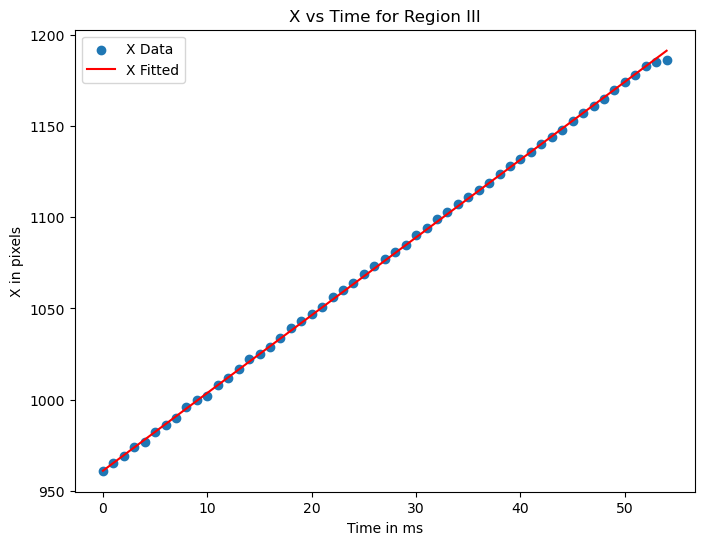

In [58]:
plt.scatter(tbar, X, label="X Data")
title = "X vs Time for Region III"
plt.plot(tbar, parametric_x_vector(tbar, *poptx), "r", label="X Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("X in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


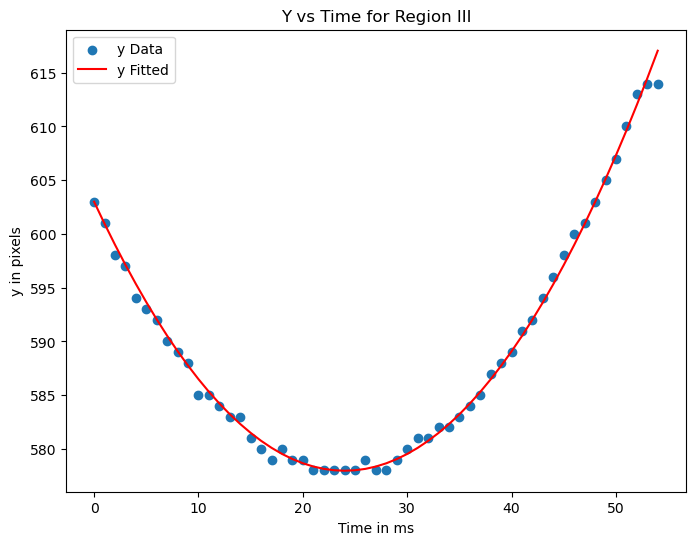

In [59]:
plt.scatter(tbar, Y, label="y Data")
title = "Y vs Time for Region III"
plt.plot(tbar, parametric_y_vector(tbar, *popty), "r", label="y Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


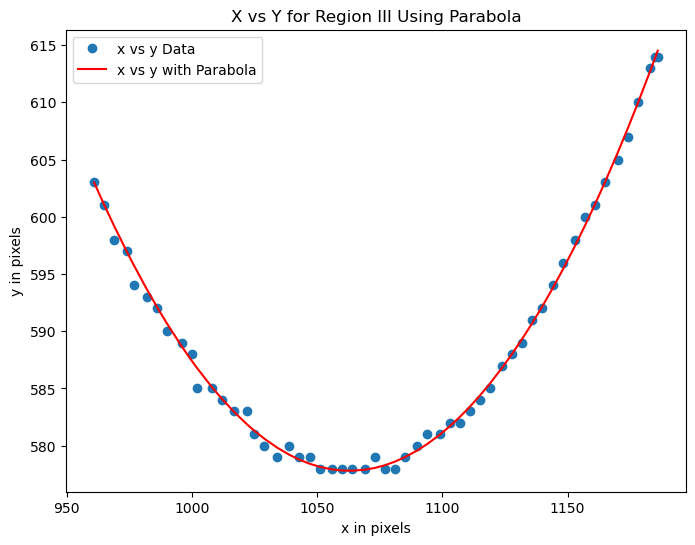

In [60]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region III Using Parabola"
plt.plot(X, the_parabola_vector(X, *popt), "r", label="x vs y with Parabola")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


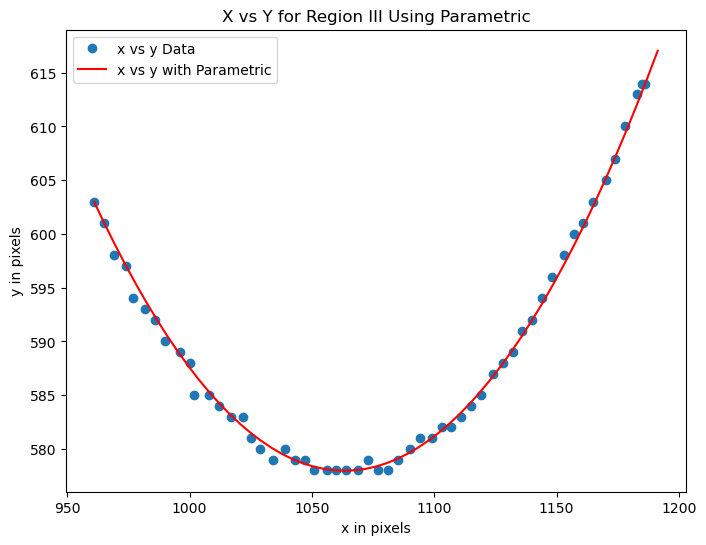

In [61]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region III Using Parametric"
plt.plot(parametric_x_vector(tbar, *poptx), parametric_y_vector(tbar, *popty), "r", label="x vs y with Parametric")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


#### Speeds In Region III


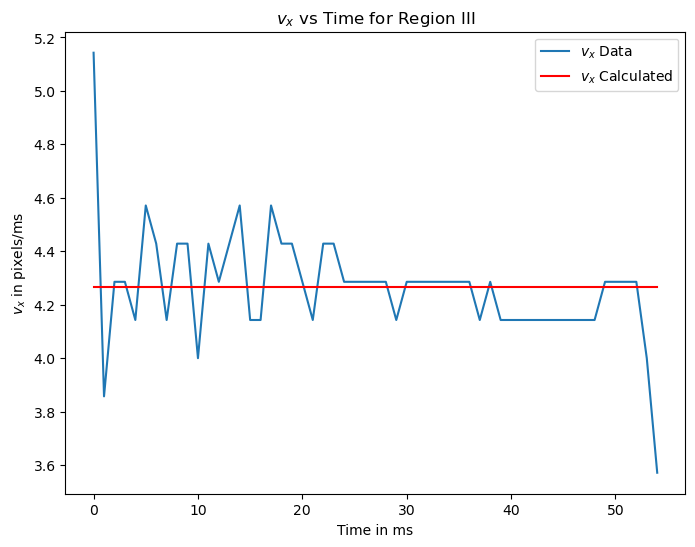

In [62]:
plt.plot(tbar, region_3["vx"].values, label="$v_x$ Data")
title = "$v_x$ vs Time for Region III"
plt.plot(tbar, vx, "r", label="$v_x$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_x$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


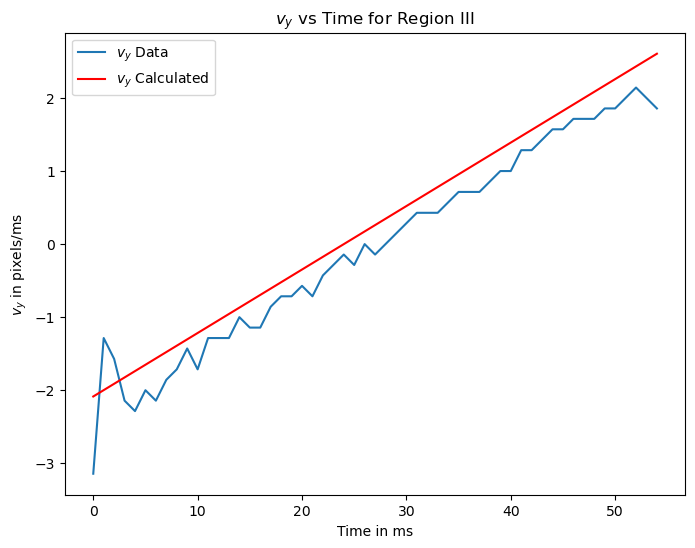

In [63]:
plt.plot(tbar, region_3["vy"].values, label="$v_y$ Data")
title = "$v_y$ vs Time for Region III"
plt.plot(tbar, vy, "r", label="$v_y$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_y$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


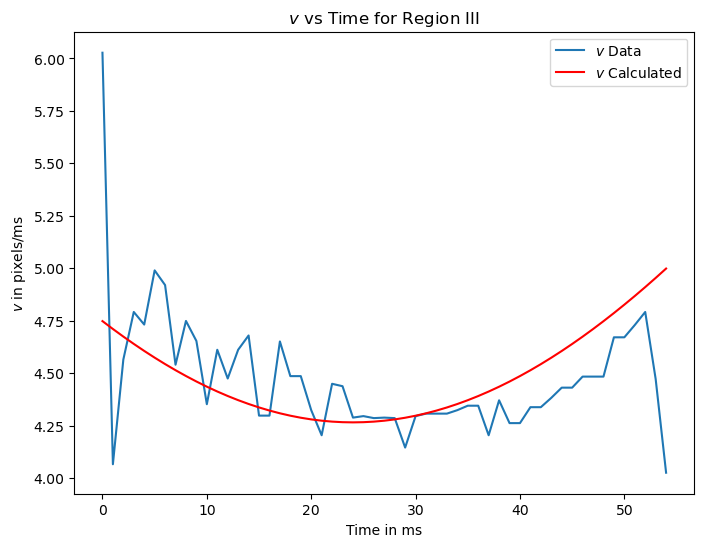

In [64]:
plt.plot(tbar, region_3["v"].values, label="$v$ Data")
title = "$v$ vs Time for Region III"
plt.plot(tbar, v, "r", label="$v$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


#### Angle In Region III


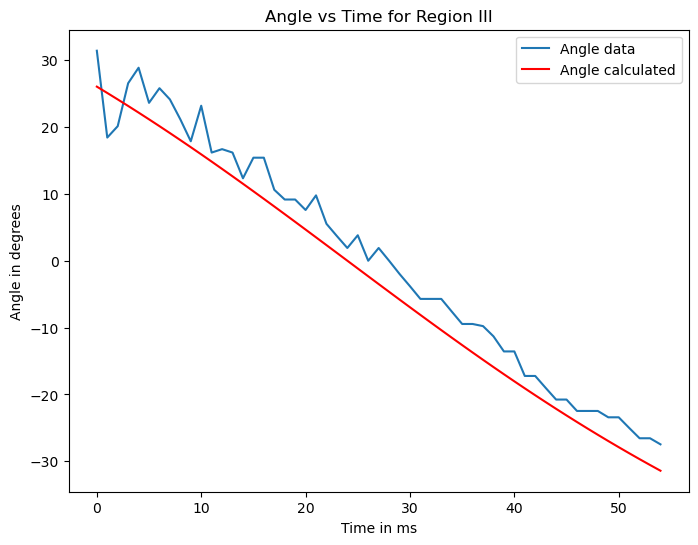

In [65]:
plt.plot(region_3["angle"].values, label="Angle data")
title = "Angle vs Time for Region III"
plt.plot(-angles, "r", label="Angle calculated")
plt.xlabel("Time in ms")
plt.ylabel("Angle in degrees")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.legend()
plt.show()


### Getting The Required Informations In Region III


In [66]:
g_raw = popty[1]
vx_using_curve = poptx[0]
vy_using_curve = popty[1]
v_using_curve = np.sqrt(vx_using_curve**2 + vy_using_curve**2)


In [67]:
fps = 1000
pixels = 0.0115
speed_conversion = pixels * fps
acceleration_conversion = pixels * fps**2
g_in_region_3 = g_raw * acceleration_conversion
g_in_region_3


999.1154919303152

In [68]:
x_velocity_at_leave_frame_using_c = vx[0]
y_velocity_at_leave_frame_using_c = vy[0]
velocity_at_leave_frame_using_c = v[0]
angle_at_leave_frame_using_c = angles[0]
x_velocity_at_leave_frame_using_c, y_velocity_at_leave_frame_using_c, velocity_at_leave_frame_using_c, angle_at_leave_frame_using_c


(4.265424891120087, -2.085562816639378, 4.747991339917922, -26.05614034212286)

### Adding the Information for Region III to DataFrame


In [69]:
new_info_df_for_region_3 = pd.DataFrame(
    {"vx": vx, "vy": vy, "v": v, "angle": angles, "time": t}
)
new_info_df_for_region_3.columns = [
    "vx_using_curve",
    "vy_using_curve",
    "v_using_curve",
    "angle_using_curve",
    "time",
]


## Region I


### Data For Region I


In [70]:
region_1 = df_c[df_c["Region"] == "I"]


In [71]:
X = region_1["x"].values
x0 = X[0]
Y = region_1["y"].values
y0 = Y[0]
t = region_1["time"].values
offset = t[0]
tbar = t - offset


In [72]:
x0, y0


(870.0, 442.0)

In [73]:
tbar


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52])

### Fitting the Curves


In [74]:
the_parabola = partial(the_parabola_to_fit, x0=x0, y0=y0)
parametric_x = partial(parametric_x_to_fit, x0=x0)
parametric_y = partial(parametric_y_to_fit, y0=y0)
the_parabola_vector = np.vectorize(the_parabola)
parametric_x_vector = np.vectorize(parametric_x)
parametric_y_vector = np.vectorize(parametric_y)


In [75]:
popt, pcov = curve_fit(the_parabola, X, Y)
popty, pcovy = curve_fit(parametric_y, tbar, Y)
poptx, pcovx = curve_fit(parametric_x, tbar, X)


In [76]:
popt, popty, poptx


(array([-21.79826947,   0.84614388]),
 array([0.23892802, 0.08825658]),
 array([-0.07737922]))

### Caparing Results


Using

$$
m = \frac{v_y}{v_x}\\
a = \frac{g}{2v_x^2}
$$

we can check whether the parameters by both the equations are the same.


In [77]:
m_by_parametric = popty[0] / poptx[0]
m_by_parabola = popt[0]
m_by_parametric, m_by_parabola


(-3.0877541496210723, -21.798269474933804)

In [78]:
a_by_parametric = popty[1] / poptx[0] ** 2 / 2
a_by_parabola = popt[1]
a_by_parametric, a_by_parabola


(7.370014648992346, 0.8461438822825035)

### Calculating Informations From Parameters


#### The Speeds


Next, we'll see how the calculated velocities are? The eqaution for the speeds are:

$$
v_x(t) = v_{x0}\\
v_y(t) = v_{y0} + gt
$$


In [79]:
vy = popty[0] + popty[1] * (tbar)
vx = np.ones(len(tbar)) * poptx[0]
v = np.sqrt(vy**2 + vx**2)


#### The Angle


Next, let's calculate the angle between the x and y velocity.


In [80]:
angles = np.arctan(vy / vx) * 180 / np.pi


### Visualizating Results


#### x and y Coordinates


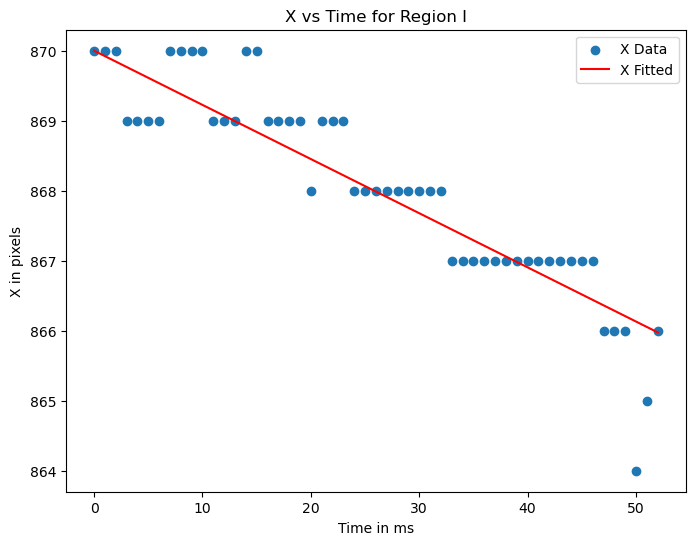

In [81]:
plt.scatter(tbar, X, label="X Data")
title = "X vs Time for Region I"
plt.plot(tbar, parametric_x_vector(tbar, *poptx), "r", label="X Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("X in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


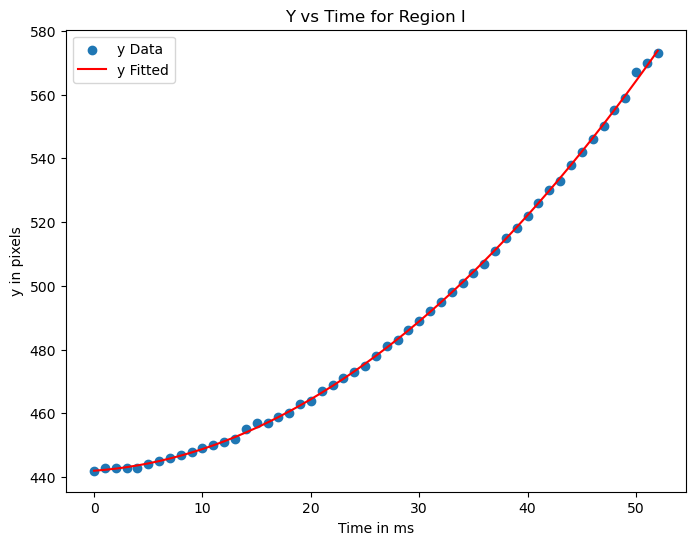

In [82]:
plt.scatter(tbar, Y, label="y Data")
title = "Y vs Time for Region I"
plt.plot(tbar, parametric_y_vector(tbar, *popty), "r", label="y Fitted")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


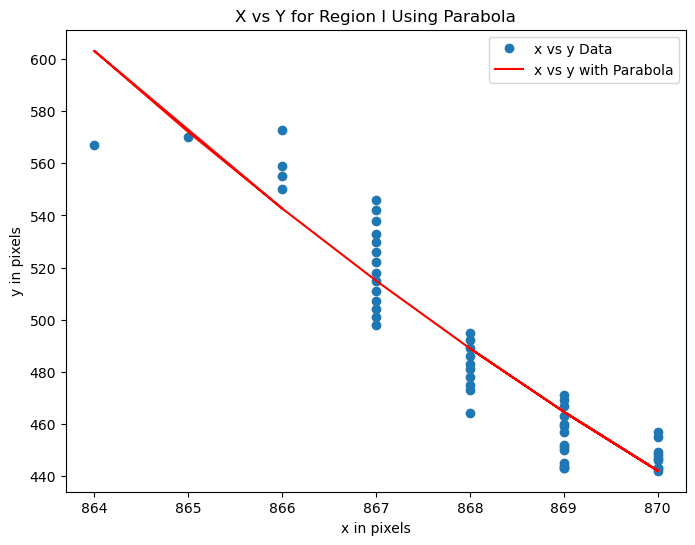

In [83]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region I Using Parabola"
plt.plot(X, the_parabola_vector(X, *popt), "r", label="x vs y with Parabola")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


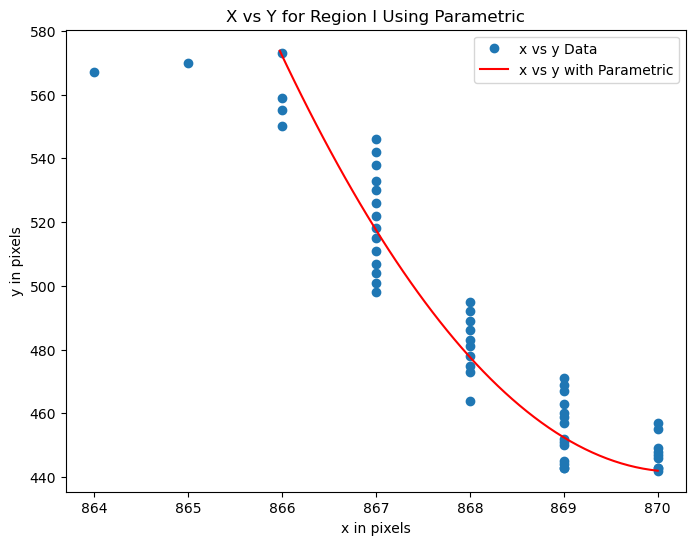

In [84]:
plt.plot(X, Y, "o", label="x vs y Data")
title = "X vs Y for Region I Using Parametric"
plt.plot(parametric_x_vector(tbar, *poptx), parametric_y_vector(tbar, *popty), "r", label="x vs y with Parametric")
plt.legend()
plt.xlabel("x in pixels")
plt.ylabel("y in pixels")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.show()


#### Speeds


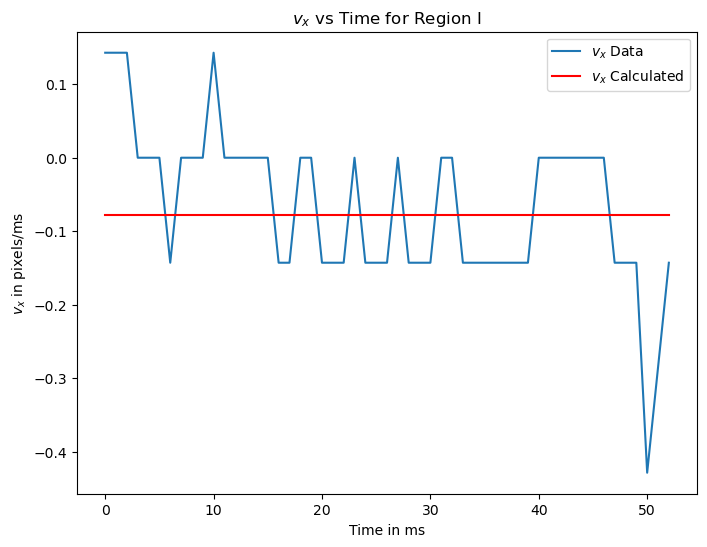

In [85]:
plt.plot(tbar, region_1["vx"].values, label="$v_x$ Data")
title = "$v_x$ vs Time for Region I"
plt.plot(tbar, vx, "r", label="$v_x$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_x$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


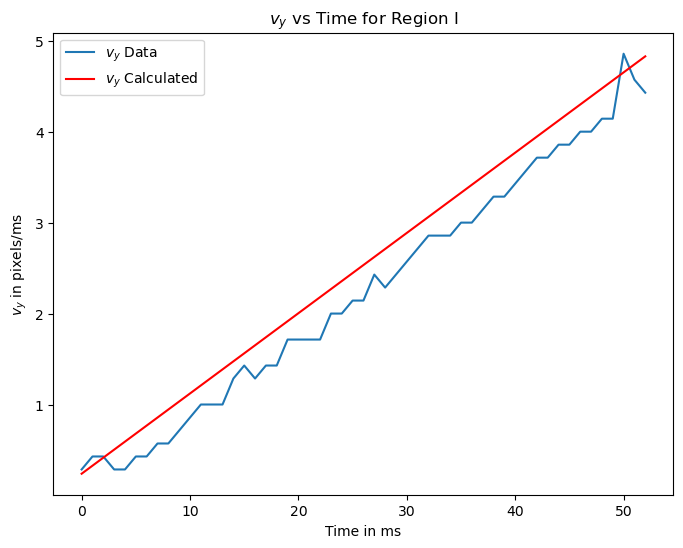

In [86]:
plt.plot(tbar, region_1["vy"].values, label="$v_y$ Data")
title = "$v_y$ vs Time for Region I"
plt.plot(tbar, vy, "r", label="$v_y$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v_y$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


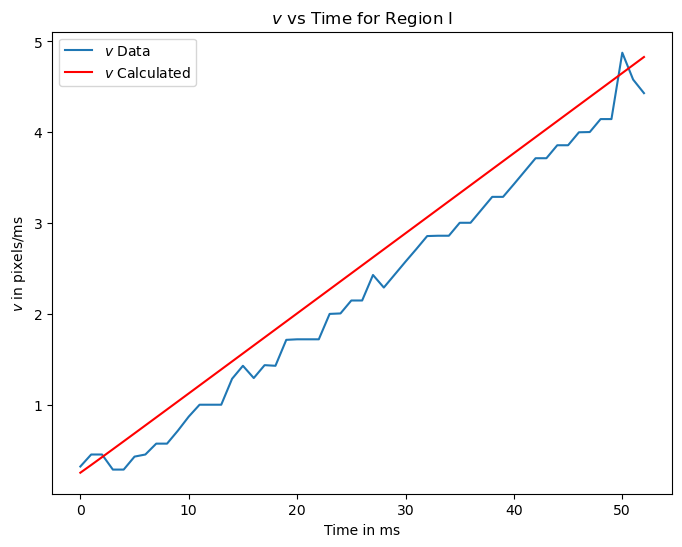

In [87]:
plt.plot(tbar, region_1["v"].values, label="$v$ Data")
title = "$v$ vs Time for Region I"
plt.plot(tbar, v, "r", label="$v$ Calculated")
plt.legend()
plt.xlabel("Time in ms")
plt.ylabel("$v$ in pixels/ms")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_").replace("$", "") + ".png"
plt.savefig(save_name)
plt.show()


#### Angle


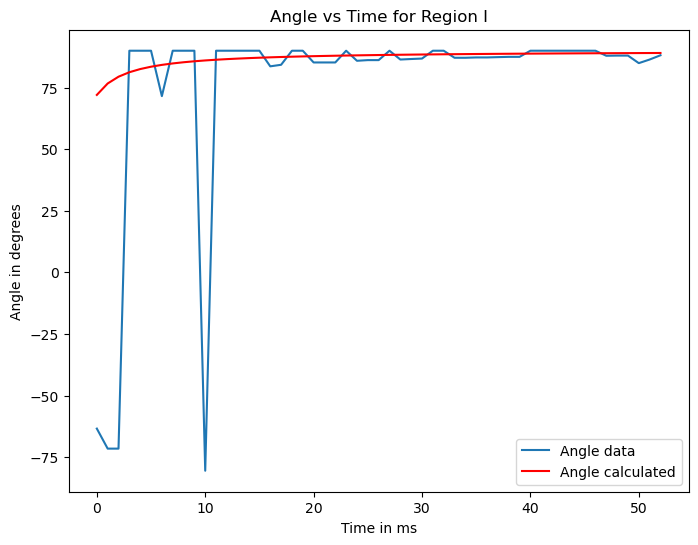

In [88]:
plt.plot(region_1["angle"].values, label="Angle data")
title = "Angle vs Time for Region I"
plt.plot(-angles, "r", label="Angle calculated")
plt.xlabel("Time in ms")
plt.ylabel("Angle in degrees")
plt.title(title)
save_name = RESULT_DIR + "/" + title.replace(" ", "_") + ".png"
plt.savefig(save_name)
plt.legend()
plt.show()


### Getting The Required Informations


In [89]:
fps = 1000
pixels = 0.0115
speed_conversion = pixels * fps
acceleration_conversion = pixels * fps**2
g_raw = popty[1]
g_in_region_1 = g_raw * acceleration_conversion
g_in_region_1


1014.9506435655796

In [90]:
x_velocity_at_contact_frame_using_c = vx[-1]
y_velocity_at_contact_frame_using_c = vy[-1]
velocity_at_contact_frame_using_c = v[-1]
angle_at_contact_frame_using_c = angles[-1]
x_velocity_at_contact_frame_using_c, y_velocity_at_contact_frame_using_c, velocity_at_contact_frame_using_c, angle_at_contact_frame_using_c


(-0.0773792236473347, 4.828270059381961, 4.828890070251813, -89.08184020955889)

In [91]:
h_using_c = Y[-1] - Y[0]
h_using_c


131.0

In [92]:
if angle_at_contact_frame_using_c < 0:
    angle_at_contact_frame_using_c = angle_at_contact_frame_using_c + 180


In [93]:
new_info_df_for_region_1 = pd.DataFrame(
    {"vx": vx, "vy": vy, "v": v, "angle": angles, "time": t}
)
new_info_df_for_region_1.columns = [
    "vx_using_curve",
    "vy_using_curve",
    "v_using_curve",
    "angle_using_curve",
    "time",
]


# Adding the Additional Information


## Saving Informations to DataFrame


In [94]:
info_df = pd.concat([new_info_df_for_region_1, new_info_df_for_region_3], axis=0)


In [95]:
df_final = pd.merge(df_c, info_df, on="time", how="left")
df_final.head()


id      x      y    r1    r2  \
0  ../../data/extracted_images/h7/007.jpg  870.0  442.0  10.0  11.0   
1  ../../data/extracted_images/h7/008.jpg  870.0  443.0  12.0  10.0   
2  ../../data/extracted_images/h7/009.jpg  870.0  443.0  11.0  10.0   
3  ../../data/extracted_images/h7/010.jpg  869.0  443.0   9.0  11.0   
4  ../../data/extracted_images/h7/011.jpg  869.0  443.0   9.0  10.0   

       theta Region  time        vx        vy         v      angle  \
0 -14.323945      I     7  0.142857  0.285714  0.319438 -63.434949   
1  40.107046      I     8  0.142857  0.428571  0.451754 -71.565051   
2  26.356059      I     9  0.142857  0.428571  0.451754 -71.565051   
3  98.548741      I    10  0.000000  0.285714  0.285714  90.000000   
4  92.819163      I    11  0.000000  0.285714  0.285714  90.000000   

   vx_using_curve  vy_using_curve  v_using_curve  angle_using_curve  
0       -0.077379        0.238928       0.251146         -72.054936  
1       -0.077379        0.327185       0.336210         -76.694019  
2       -0.077379        0.415441       0.422586         -79.449107  
3       -0.077379        0.503698       0.509607         -81.266366  
4       -0.077379        0.591954       0.596990         -82.552624

## The Text Information


### Creating the Text


In [96]:
pattern = "***"
information = f"""
{pattern*20}
### TOTAL FRAMES: {total_frames}
### NONE FRAMES: {none_frames}
### UNREALISTIC FRAMES: {unrealistic}
### PASSTHROUGH: {passthrough}

{pattern*20}
USING THE SMOOTHENED DATA
AT CONTACT FRAME:
### H: {np.round(hs, 1)}
### ANGLE: {np.round(-90+angle_at_contact_frame_s+float(angle), 2)}
### VELOCITY: {np.round(velocity_at_contact_frame_s, 2)}
### X VELOCITY: {np.round(x_velocity_at_contact_frame_s, 2)}
### Y VELOCITY: {np.round(y_velocity_at_contact_frame_s, 2)}

AT LEAVE FRAME:
### ANGLE: {np.round(angle_at_leave_frame_s, 2)}
### VELOCITY: {np.round(velocity_at_leave_frame_s, 2)}
### X VELOCITY: {np.round(x_velocity_at_leave_frame_s, 2)}
### Y VELOCITY: {np.round(y_velocity_at_leave_frame_s, 2)}

{pattern*20}
USING THE RAW DATA
AT CONTACT FRAME:
### H: {np.round(hc, 1)}
### ANGLE: {np.round(-90+angle_at_contact_frame_c+float(angle), 2)}
### VELOCITY: {np.round(velocity_at_contact_frame_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_contact_frame_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_contact_frame_c, 2)}

AT LEAVE FRAME:
### ANGLE: {np.round(angle_at_leave_frame_c, 2)}
### VELOCITY: {np.round(velocity_at_leave_frame_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_leave_frame_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_leave_frame_c, 2)}

{pattern*20}
USING CURVE FITTING
AT CONTACT FRAME:
### H: {np.round(h_using_c, 1)}
### ANGLE: {np.round(-90+angle_at_contact_frame_using_c+float(angle), 2)}
### VELOCITY: {np.round(velocity_at_contact_frame_using_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_contact_frame_using_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_contact_frame_using_c, 2)}
### g: {np.round(g_in_region_1, 2)}

AT LEAVE FRAME:
### ANGLE: {np.round(-angle_at_leave_frame_using_c, 2)}
### VELOCITY: {np.round(velocity_at_leave_frame_using_c, 2)}
### X VELOCITY: {np.round(x_velocity_at_leave_frame_using_c, 2)}
### Y VELOCITY: {np.round(y_velocity_at_leave_frame_using_c, 2)}
### g: {np.round(g_in_region_3, 2)}
"""
print(information)



************************************************************
### TOTAL FRAMES: 273
### NONE FRAMES: 120
### UNREALISTIC FRAMES: 2
### PASSTHROUGH: 0

************************************************************
USING THE SMOOTHENED DATA
AT CONTACT FRAME:
### H: 132.1
### ANGLE: 24.16
### VELOCITY: 4.46
### X VELOCITY: -0.07
### Y VELOCITY: 4.46

AT LEAVE FRAME:
### ANGLE: 26.88
### VELOCITY: 4.85
### X VELOCITY: 4.33
### Y VELOCITY: -2.19

************************************************************
USING THE RAW DATA
AT CONTACT FRAME:
### H: 131.0
### ANGLE: 23.15
### VELOCITY: 4.43
### X VELOCITY: -0.14
### Y VELOCITY: 4.43

AT LEAVE FRAME:
### ANGLE: 29.2
### VELOCITY: 5.56
### X VELOCITY: 4.86
### Y VELOCITY: -2.71

************************************************************
USING CURVE FITTING
AT CONTACT FRAME:
### H: 131.0
### ANGLE: 25.92
### VELOCITY: 4.83
### X VELOCITY: -0.08
### Y VELOCITY: 4.83
### g: 1014.95

AT LEAVE FRAME:
### ANGLE: 26.06
### VELOCITY: 4.75
### X VELO

First, create a new string containing just the previous text file. Else we'll duplicate the text file.


In [97]:
with open(RESULT_DIR + "/info.txt", "r+") as f:
    texts = f.readlines()
    text = "".join(texts[:6])
print(text[:125])
all_text = text + information


### h7.tif
### First Frame ID: 006
### Last Frame ID: 263
### Contact Frame ID: 059
### Leave Frame ID: 079
### Angle: 25



In [98]:
with open(RESULT_DIR + "/info.txt", "w") as f:
    f.writelines(all_text)


### Save the DataFrames


In [99]:
df_final.to_csv(RESULT_DIR + f"/{sequence}_final.csv", index=False)
df_s.to_csv(RESULT_DIR + f"/{sequence}_smoothened.csv", index=False)
df_c.to_csv(RESULT_DIR + f"/{sequence}_raw.csv", index=False)
